In [20]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, normaltest

In [21]:
# laoding the titanic dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Initial EDA (Exploratory Data Analysis)

In [22]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# dataset shape
df.shape # rows x column

(891, 12)

In [25]:
# to view the last rows
# by default 5
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [26]:
df.iloc[1:6]
# to view the inbetween rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [27]:
df['Survived']
# to view a particular column only

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [28]:
# Checking for Missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [29]:
# alternate way
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [30]:
# total number of rows
len(df)

891

In [31]:
# Check for Duplicates
df.duplicated().sum()

np.int64(0)

In [32]:
# handle the Duplicates
df = df.drop_duplicates()

In [33]:
df.shape

(891, 12)

In [35]:
#used to count unique rows
df.value_counts()

,,,,,,,,,,,,count
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1


## Checking categorical variables

In [36]:
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


## Data Cleaning

In [37]:
# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-37-959dd9e4cda5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [38]:
# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-38-be283f66c553>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [39]:
# Drop 'Cabin' as too many missing values
df.drop('Cabin', axis=1, inplace=True)


## Univariate Analysis

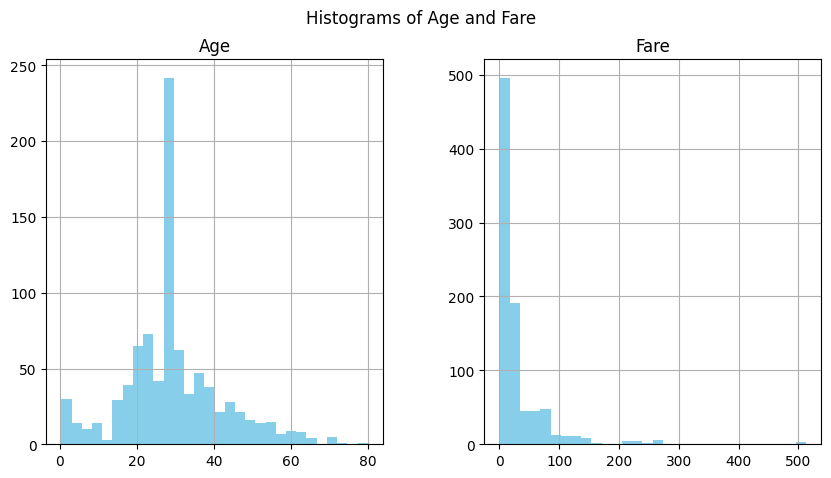

In [40]:
# Histograms for numerical features
df[['Age', 'Fare']].hist(bins=30, figsize=(10,5), color='skyblue')
plt.suptitle('Histograms of Age and Fare')
plt.show()

## 1. Histogram of Age and Fare
Observation:

The majority of passengers were aged between 20 to 40 years.

Fare distribution is highly right-skewed — most passengers paid a lower fare, but a few paid extremely high fares.



<ipython-input-41-b46b0ac3b22f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


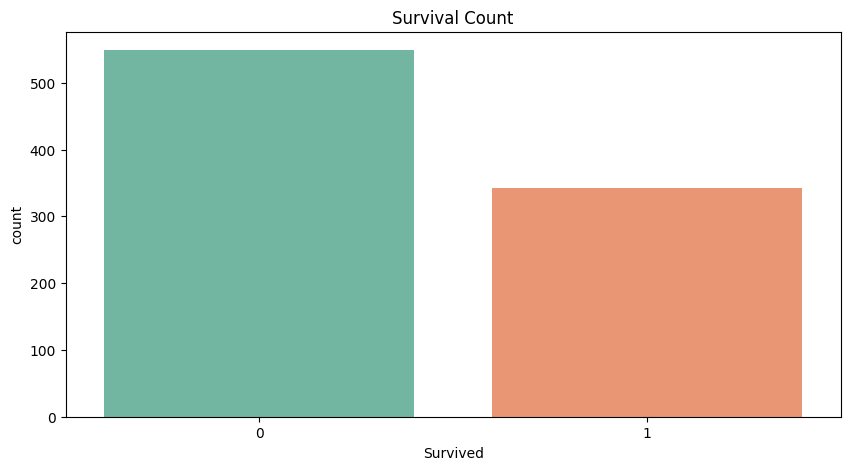

In [41]:
# Countplots for categorical features
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survival Count')
plt.show()


## 2. Countplot of Survival
Observation:

More passengers did not survive than survived.

Roughly 60% of passengers died while 40% survived.

<ipython-input-42-d5b58c732944>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set3')


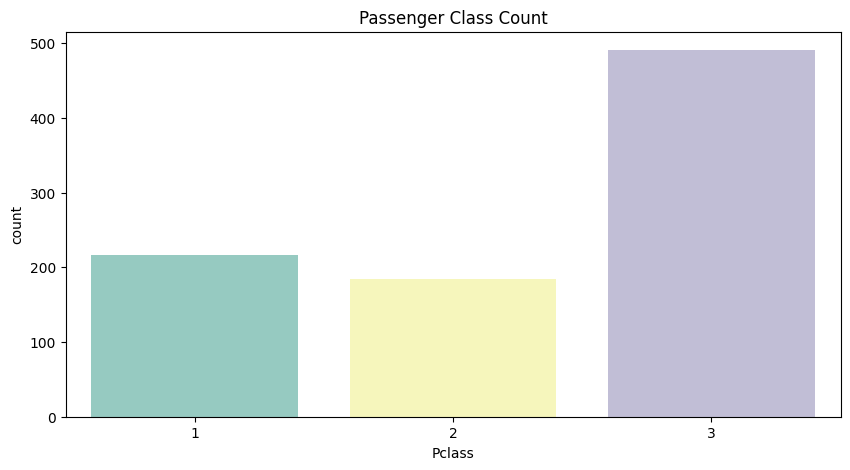

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass', data=df, palette='Set3')
plt.title('Passenger Class Count')
plt.show()


## 3. Countplot of Passenger Class (Pclass)
Observation:

Most passengers belonged to 3rd class.

Very few were in 1st class, indicating that most travelers were economically lower class.

<ipython-input-43-146427b6f070>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set1')


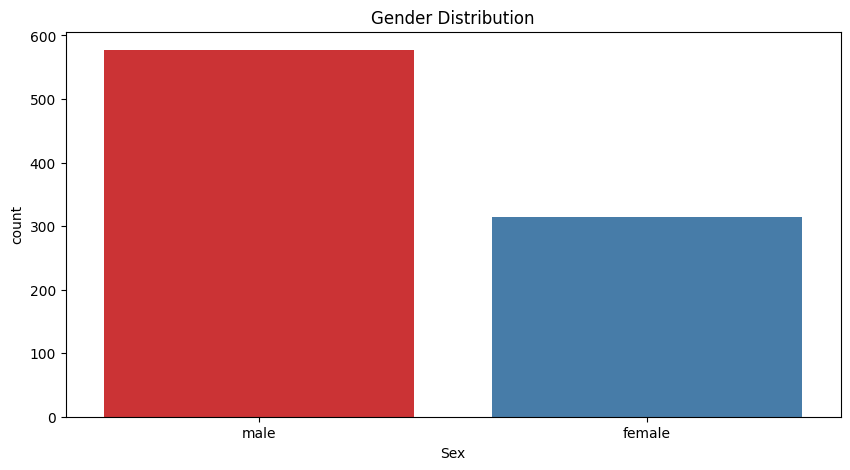

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex', data=df, palette='Set1')
plt.title('Gender Distribution')
plt.show()

## 4. Countplot of Gender (Sex)
Observation:

There were significantly more males than females on board.

Around two-thirds of the passengers were male.



## Bivariate Analysis

<ipython-input-44-cce6d97c1e4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='coolwarm')


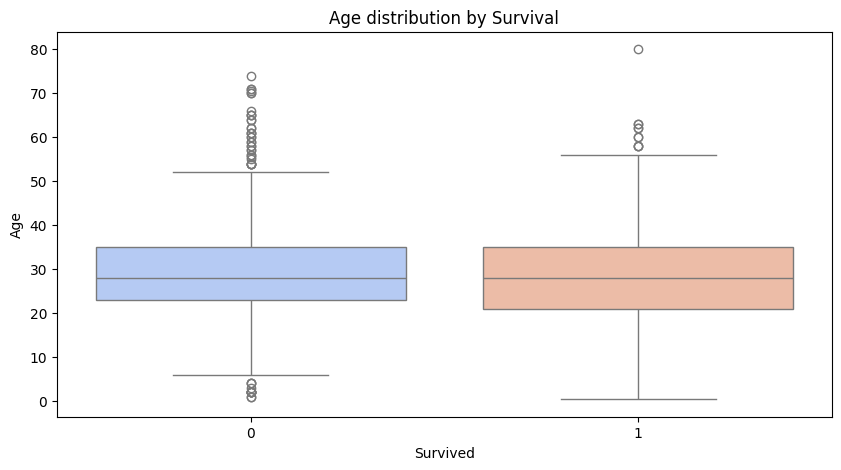

In [44]:
# Boxplot: Age vs Survived
plt.figure(figsize=(10,5))
sns.boxplot(x='Survived', y='Age', data=df, palette='coolwarm')
plt.title('Age distribution by Survival')
plt.show()

## 1. Boxplot: Age vs Survival
Observation:

Younger passengers (children) had slightly higher survival chances.

Median age of survivors is lower than non-survivors.

Some very old passengers also survived, but less frequently.

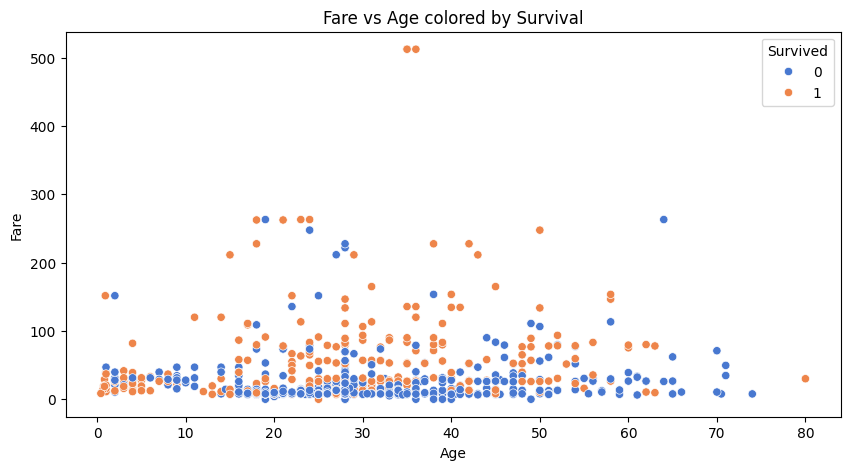

In [45]:
# Scatterplot: Fare vs Age colored by Survived
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='muted')
plt.title('Fare vs Age colored by Survival')
plt.show()


## 2. Scatterplot: Fare vs Age Colored by Survival
Observation:

Passengers who paid a higher fare had a higher survival rate.

Many young passengers who paid a low fare did not survive.

A few outliers paid extremely high fares and survived.

## Groupby analysis

In [46]:
print("\nMean survival rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())


Mean survival rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


## 1. Groupby Analysis: Survival Rate by Gender
Observation:

Females had a much higher survival rate (~74%) compared to males (~19%).

"Women and children first" policy likely influenced survival rates.

In [47]:
print("\nMean survival rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())


Mean survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


## Multivariate Analysis

## Groupby Analysis: Survival Rate by Pclass
Observation:

1st class passengers had the highest survival rate (~63%).

3rd class passengers had the lowest survival rate (~24%).

Higher socio-economic status played a big role in survival.



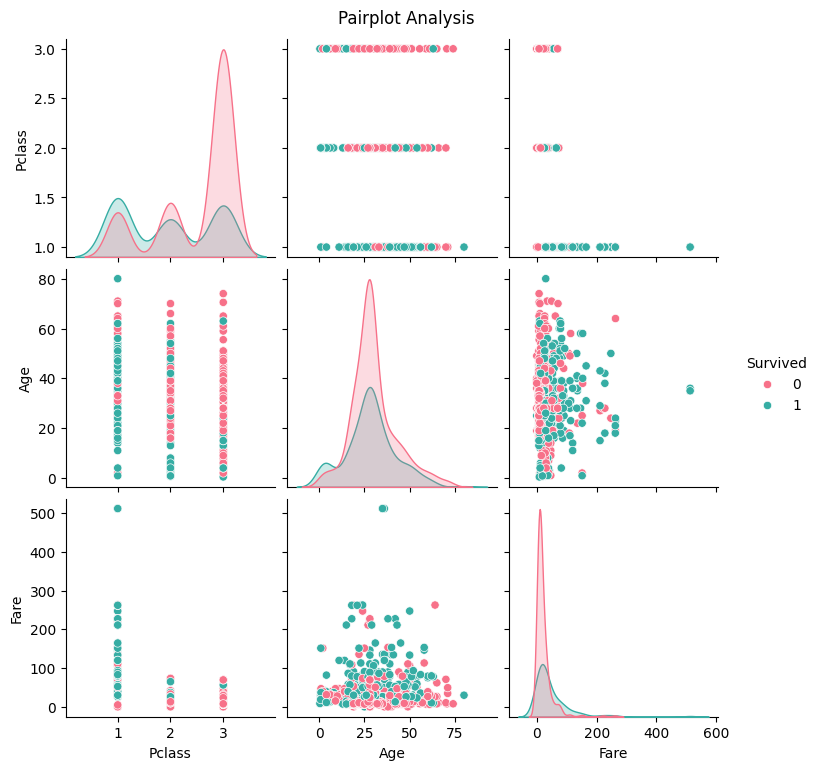

In [48]:
# Pairplot
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived', palette='husl')
plt.suptitle('Pairplot Analysis', y=1.02)
plt.show()


## 3. Pairplot
Observation:

Survivors generally belonged to higher classes and paid higher fares.

Non-survivors were densely concentrated among lower fares and lower classes.

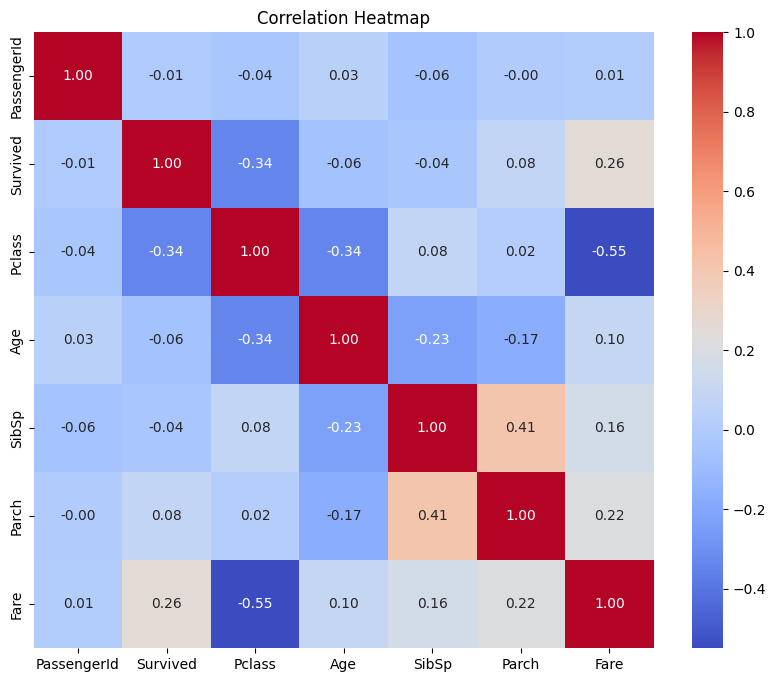

In [50]:
# Heatmap for correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 4.  Correlation Heatmap
Observation:

Strongest positive correlation: Fare and Pclass (negatively, because 1st class = low number).

Survival is positively correlated with Fare and negatively correlated with Pclass.

Weak or no significant correlation with Age.